### ***AUTHORS***
1. Kiprono Ben
2. Norman Mwapea
3. Pauline Kariuki
4. Wesley Owino
5. Judith Otieno
6. Alvin Kipleting

## BUSINESS UNDERSTANDING

### OVERVIEW

This is a Natural Language Processing (NLP)-driven sentiment analysis project designed to decode public opinion on two of the world’s most influential tech companies; **Apple** and **Google**. By leveraging machine learning techniques to analyze thousands of real tweets, the project aims to classify user sentiment as *positive*, *negative*, or *neutral*.  

This initiative demonstrates how social media analytics can provide actionable insights for companies seeking to understand consumer perceptions, monitor brand reputation, and anticipate market trends. Ultimately, the project serves as a prototype for a scalable, intelligent sentiment monitoring system applicable across industries.

### BACKGROUND

Social media has become the world’s largest real-time feedback loop. Millions of users share their thoughts daily about products, services, and brands; creating a goldmine of unstructured data that reveals how people truly feel.  
For technology companies like **Apple** and **Google**, such sentiment can directly influence *brand equity*, *purchase behavior*, and *public trust*. Tweets praising a product’s innovation or criticizing a software update can ripple across digital spaces, shaping collective opinion within hours.  
Understanding these emotional currents is therefore critical for modern businesses. Sentiment analysis transforms raw textual chatter into measurable, strategic insight—empowering companies to react faster, market smarter, and communicate better.

### OBJECTIVES

The main goals of the project are to:

1. Develop a Natural Language Processing (NLP) model that classifies tweets related to Apple and Google as *positive*, *negative*, or *neutral*.  
2. Preprocess and transform raw text into machine-readable features using tokenization, normalization, stopword removal, and TF-IDF vectorization.  
3. Evaluate multiple machine learning algorithms to identify the most accurate and interpretable classifier.  
4. Generate data-driven insights about brand sentiment patterns to support business and marketing decisions.  
5. Lay the groundwork for an automated brand intelligence system capable of tracking sentiment across multiple platforms and industries.

### SUCCESS METRICS

Success will be defined through a mix of technical and business outcomes:

- **Model Performance:** Achieving at least 80% F1-score across sentiment classes.  
- **Data Integrity:** Clean, balanced, and reproducible dataset suitable for future extensions.  
- **Interpretability:** Ability to visualize top sentiment-driving words and phrases for explainability.  
- **Insight Quality:** Sentiment trends that clearly reflect real-world brand perceptions.  
- **Scalability:** Modular design allowing future integration with streaming APIs for live monitoring.

### STAKEHOLDERS

The beneficiaries of this undertaking include:
  
- **Marketing Analysts:** Use sentiment insights to understand public opinion and campaign impact.  
- **Product Managers:** Monitor consumer feedback and sentiment shifts after product launches.  
- **Executives & Decision Makers:** Leverage findings to inform strategic brand and communication strategies.
- **Data Science & NLP Teams:** Responsible for model design, feature engineering, and evaluation.  
- **Research & Development Teams:** Explore applications of the model in broader domains like product reviews, customer feedback, and crisis management.

#### RELEVANCE

TechTones bridges the gap between data and perception. It shows how machine learning can turn the chaos of social media into structured intelligence; helping organizations not only track how people feel, but also why they feel that way.
This project highlights the growing role of NLP in business strategy, reputation management, and competitive intelligence, providing a strong proof of concept for sentiment analysis as a key driver of modern data-driven decision-making.

## DATA UNDERSTANDING
 
The dataset used in this project is sourced from [CrowdFlower](https://data.world/crowdflower/brands-and-product-emotions) and contains over 9,000 Tweets referencing Apple and Google products. Each Tweet has been annotated with information identifying the product or brand mentioned and the emotion expressed toward it. It offers a real-world foundation for supervised sentiment analysis in Natural Language Processing (NLP). 

It contains the following features with their descriptions:

| Feature | Description |
|--------------|----------------|
| tweet_text | The full text of each Tweet referencing Apple or Google products. |
| emotion_in_tweet_is_directed_at | The product or brand mentioned (e.g iPhone, iPad, Google, iPad/iPhone App). |
| is_there_an_emotion_directed_at_a_brand_or_product | The annotated sentiment label -> *Positive emotion*, *Negative emotion*, or *No emotion toward brand or product*. |

This schema supports a supervised learning setup where tweet_text acts as the input feature and is_there_an_emotion_directed_at_a_brand_or_product serves as the target variable for classification.

Awesome! Now, let's get our hands dirty.

### EXPLORING THE DATA

We begin by loading the data and performing an initial exploration to get a sense of its structure and content. But first, we gather our essential tools; just as a painter readies their palette and brushes before creating a masterpiece.

In [ ]:
# ======= [Import all relevant libraries] =======

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Usual Suspects
import numpy as np           # Mathematical operations
import pandas as pd          # Data manipulation

# Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns
from wordcloud import WordCloud         # Word Cloud
from wordcloud import STOPWORDS

# String manipulation
import re

# Counting items
from collections import Counter

# NLP
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.tokenize import RegexpTokenizer           # Tokenization
from nltk.corpus import stopwords                   # Stopwords
from nltk.stem import WordNetLemmatizer             # Lemmatization

# Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Pipelines
from sklearn.pipeline import Pipeline

# ML Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression         # Logistic Regression
from sklearn.tree import DecisionTreeClassifier             # Decision Tree

# ML Model Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    ConfusionMatrixDisplay, confusion_matrix,
    roc_curve, auc,
    classification_report
)

# Set column display to maximum
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Now we load the data.

In [567]:
df = pd.read_csv("C:\\Users\\lenovo\\OneDrive\\Desktop\\DS\\PROJECTS\\TechTones\\Apple and Google Twitter Sentiments.csv", encoding="ISO-8859-1")
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,NaN,No emotion toward brand or product


*Observation:* The dataset is consistent and admittedly very messy.

Then we check the number of records and fatures we are working with.

In [568]:
print(f"The dataset has {df.shape[0]} records and {df.shape[1]} features.")

The dataset has 9093 records and 3 features.


We’ve got over 9,000 records, a solid data haul. Let’s see how unique the dataset is.


In [569]:
# ======= [Dataset Uniqueness] =======

# Number of unique values in each column
print("Number of unique values in:", '\n')
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Unique values in each column
print("\nUnique Values in:")
for col in df.columns:
    print(f"\n{col}:")
    print(df[col].unique())

Number of unique values in: 

tweet_text: 9065 unique values
emotion_in_tweet_is_directed_at: 9 unique values
is_there_an_emotion_directed_at_a_brand_or_product: 4 unique values

Unique Values in:

tweet_text:
['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'
 "@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW"
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.'
 ...
 "Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev"
 'Some Verizon iPhone customers complained their time fell back an hour this weekend.  Of course they were the New Yorkers who attended #SXSW.'
 '\x8cÏ¡\x8eÏà\x8aü_\x8b\x81Ê\x8b\x81Î\x8b\x81Ò\x8b\x81£\x8b\x81Á\x8bââ\x8b\x81_\x8b\x81£\x8b\x81\x8f\x8bâ_\x8bÛâRT @mention Google Tes

*Observation:*

- There are over 9,065 unique tweet entries, meaning nearly every tweet in the dataset is distinct.
- These tweets are directed to 9 unique products, capturing a range of Apple and Google products (like iPhone, Android, iPad) and some general or unspecified mentions. The presence of NaN values suggests that some tweets don’t explicitly mention a product.
- There are 4 distinct emotional classifications, reflecting the sentiment intensity or clarity.

Based on this initial preview, it makes sense to standardize the column names; keeping them short, clear, and code friendly. We’ll rename them as follows:

In [570]:
# Rename the columns
df.rename(columns={
    'tweet_text': 'tweet',
    'emotion_in_tweet_is_directed_at': 'product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'
}, inplace=True)

# Preview new column names
df.columns

Index(['tweet', 'product', 'sentiment'], dtype='object')

We further check the metadata.

In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   product    3291 non-null   object
 2   sentiment  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


*Interpretation:*

- All fields are categorical which is consistent with the data as it is in text format.
- tweet: Almost complete, with 9,092 non-null values, meaning only one missing entry.
- product: Has 3,291 non-null values, showing that about 36% of tweets mention a specific Apple or Google product. The rest are either general statements or lack a clear product reference.
- sentiment: Fully populated.

Next, we aim to deepen our understanding of the dataset by exploring the descriptive statistics of each column.

In [572]:
df.describe(include='O').T

,count,unique,top,freq
tweet,9092,9065,RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw,5
product,3291,9,iPad,946
sentiment,9093,4,No emotion toward brand or product,5389


*Observation:*

We observe that:

- The most repeated tweet appears only 5 times, suggesting very little duplication.
- Products (product): Out of all the 9 distinct products, iPads lead the conversation -> mentioned 946 times, indicating a strong public interest in them.
- The dataset is dominated by neutral or indifferent opinions -> 'No emotion toward brand or product' appears 5,389 times, making up more than half the data. This suggests that while people talk about these brands a lot, many tweets don’t clearly express positive or negative emotions -> neutrality.

### DATA QUALITY CHECK

In [573]:
# ======= [Check for duplicates and missing values] =======

# Check for duplicates
print("Duplicates:", df.duplicated().sum())

# Check for missing values and missingness percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing values and percentage missingness:\n", missing_info)

Duplicates: 22

Missing values and percentage missingness:
            Missing Values  Percentage
tweet                   1    0.010997
product              5802   63.807324
sentiment               0    0.000000


*Comment on data quality:*

Yikes! The product column has more than half of its values missing; we’ll address that appropriately. There are also 22 duplicate records, which we’ll remove, along with any rows containing null tweets.

# DATA CLEANING AND PREPARATION

To enable meaningful analysis, we must first clean and prepare the data through the following cleaning and preprocessing steps:

#### 1. Drop duplicate rows and nulls only in tweet columns.

In [574]:
# Drop duplicates and nulls 
df = df.drop_duplicates().dropna(subset=['tweet'])

# Sanity check
# Re-check for duplicates
print("Duplicates:", df.duplicated().sum())

# Re-check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values})
print("\nMissing values:\n", missing_info)

Duplicates: 0

Missing values:
            Missing Values
tweet                   0
product              5788
sentiment               0


#### 2. Dealing missing values in product column

We begin by inspecting the null values in the product column in relation to the tweet content to determine whether any clues about the missing product can be inferred from the tweet.

In [575]:
# Examine tweets with missing product values 
# to identify potential product mentions within the text
df[df['product'].isna()][['tweet', 'product']]

,tweet,product
5,@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd,NaN
16,Holler Gram for iPad on the iTunes App Store - http://t.co/kfN3f5Q (via @marc_is_ken) #sxsw,NaN
32,"Attn: All #SXSW frineds, @mention Register for #GDGTLive and see Cobra iRadar for Android. {link}",NaN
33,Anyone at #sxsw want to sell their old iPad?,NaN
34,Anyone at #SXSW who bought the new iPad want to sell their older iPad to me?,NaN
...,...,...
9087,"@mention Yup, but I don't have a third app yet. I'm on Android, any suggestions? #SXSW CC: @mention",NaN
9089,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",NaN
9090,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",NaN
9091,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,NaN


From the inspection, it’s evident that several tweets with missing product values actually contain clues about the product within the text itself. However, the current tweet column is too noisy to analyze effectively. It needs cleaning and preprocessing first.

After preprocessing, we’ll create a mapping strategy to standardize product mentions:
- Any Apple-related terms (e.g iPhone, iPad) will be grouped under Apple.
- All other identifiable products will be categorized under Google.

## PREPROCESSING STEPS:

1. Convert all tweets to lowercase for uniformity.
2. Remove stopwords to eliminate irrelevant filler words.
3. Strip punctuation and special characters.
4. Tokenize the text to break it into analyzable units.
5. Apply lemmatization to reduce words to their root form.

In [576]:
# ======= [Text Preprocessing Pipeline] =======

# Initialize tools
tokenizer = RegexpTokenizer(r'\w+')
stopwords_list = set(stopwords.words('english'))  
lemmatizer = WordNetLemmatizer()

def janitor(text):

    '''
    Cleans and preprocesses tweet text for analysis.

    Steps:
        1. Remove URLs, mentions, and hashtags
        2. Lowercase text and strip whitespace
        3. Tokenize
        4. Remove stopwords and very short tokens
        5. Lemmatize words
    '''

    # 1. Remove unwanted elements
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # URLs
    text = re.sub(r"@\w+", "", text)                     # Mentions
    text = re.sub(r"#", "", text)                        # Hashtags symbol only
    text = text.lower().strip()

    # 2. Tokenize
    tokens = tokenizer.tokenize(text)

    # 3. Filter stopwords and short tokens
    tokens = [word for word in tokens if word not in stopwords_list and len(word) > 2]

    # 4. Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens


# ======= [Apply to DataFrame] =======
df['tokens'] = df['tweet'].astype(str).apply(janitor)
df['clean_tweet'] = df['tokens'].apply(' '.join)

# Preview changes
df.sample(7)

,tweet,product,sentiment,tokens,clean_tweet
2345,@mention check it. RT @mention #SXSW FREE App Festival Explorer: find the bands you want to see from your music tastes {link},iPad or iPhone App,Positive emotion,"[check, sxsw, free, app, festival, explorer, find, band, want, see, music, taste, link]",check sxsw free app festival explorer find band want see music taste link
7375,Another iPhone related dream: I invented an app that dispenses chili-cheese waffle fries. #sxsw #allcomfortfooddiet,NaN,No emotion toward brand or product,"[another, iphone, related, dream, invented, app, dispenses, chili, cheese, waffle, fry, sxsw, allcomfortfooddiet]",another iphone related dream invented app dispenses chili cheese waffle fry sxsw allcomfortfooddiet
6671,"RT @mention So the big buzz this year at #SXSW, iPad 2, of course, and Group chat/text services like Group Me or Yobongo. Now you know. #fb",NaN,No emotion toward brand or product,"[big, buzz, year, sxsw, ipad, course, group, chat, text, service, like, group, yobongo, know]",big buzz year sxsw ipad course group chat text service like group yobongo know
2267,"Could be big&gt;&gt;#Google to Launch Major New #Social Network Called #Circles, Possibly Today - {link} #tech #sxsw",NaN,No emotion toward brand or product,"[could, big, google, launch, major, new, social, network, called, circle, possibly, today, link, tech, sxsw]",could big google launch major new social network called circle possibly today link tech sxsw
1999,@mention Android needs a way to group apps like you can now do with iPad/iPod. #SXSW #hhrs,Android,Negative emotion,"[android, need, way, group, apps, like, ipad, ipod, sxsw, hhrs]",android need way group apps like ipad ipod sxsw hhrs
2837,Just picked up a @mention carry-on in soho for my #SXSW! trip tomorrow... huge #iPad line @mention,NaN,No emotion toward brand or product,"[picked, carry, soho, sxsw, trip, tomorrow, huge, ipad, line]",picked carry soho sxsw trip tomorrow huge ipad line
380,impulsive buy = all your friends at #SXSW -&gt; I now have one too. Selling my 1st gen 32gb 3g iPad now,iPad,Positive emotion,"[impulsive, buy, friend, sxsw, one, selling, 1st, gen, 32gb, ipad]",impulsive buy friend sxsw one selling 1st gen 32gb ipad


Awesome! Now we map the products into just Apple and Google.

In [577]:
# Define mapping rules
apple_products = [
    'iPhone', 'iPad or iPhone App', 'iPad', 
    'Apple', 'Other Apple product or service'
]

google_products = [
    'Google', 'Android', 'Android App', 
    'Other Google product or service'
]

# Map. Only assign if in the specific list, otherwise keep NaN
df['product'] = df['product'].apply(
    lambda x: 'Apple' if x in apple_products else ('Google' if x in google_products else np.nan)
)

# Check distribution after mapping
df['product'].value_counts(dropna=False)

product
NaN       5788
Apple     2404
Google     878
Name: count, dtype: int64

Now that we have tokenized the tweets, we can leverage these tokens to infer product associations. By examining keywords in the tokens; such as 'iphone', 'ipad', 'android', and 'google', we can impute the missing product values for tweets that didn't have explicit product labels.

In [578]:
# Examine tokens with missing product values 
# to identify potential product mentions within the text 
# and use that to impute the missing values
df[df['product'].isna()][['tokens', 'product']]

,tokens,product
5,"[new, ipad, apps, speechtherapy, communication, showcased, sxsw, conference, iear, edchat, asd]",NaN
16,"[holler, gram, ipad, itunes, app, store, via, sxsw]",NaN
32,"[attn, sxsw, frineds, register, gdgtlive, see, cobra, iradar, android, link]",NaN
33,"[anyone, sxsw, want, sell, old, ipad]",NaN
34,"[anyone, sxsw, bought, new, ipad, want, sell, older, ipad]",NaN
...,...,...
9087,"[yup, third, app, yet, android, suggestion, sxsw]",NaN
9089,"[wave, buzz, interrupt, regularly, scheduled, sxsw, geek, programming, big, news, link, google, circle]",NaN
9090,"[google, zeiger, physician, never, reported, potential, yet, fda, relies, physician, quot, operating, data, quot, sxsw, health2dev]",NaN
9091,"[verizon, iphone, customer, complained, time, fell, back, hour, weekend, course, new, yorkers, attended, sxsw]",NaN


Defining our imputation pipeline.

In [579]:
# ======= [Product imputation pipeline] =======

def impute_product(row):

    '''
        Uses the tokens to get keywords and map them to 
        either Google or Apple to impute missing product values
    '''
    
    # If product is already assigned, keep it
    if pd.notna(row['product']):
        return row['product']
    
    # If product is NaN, check tokens for keywords
    tokens = row['tokens']
    
    # Define keywords for each product
    apple_keywords = [
        'iphone', 'ipad', 'apple', 'itunes', 'ipad2', 'mac', 
        'ipod', 'macbook', 'ios', 'air', 'pro', 'imac', 'siri',
        'lightning', 'facetime', 'safari'
    ]

    google_keywords = [
        'google', 'android', 'maps', 'chrome', 'gmail', 'pixel', 
        'nexus', 'workspace', 'assistant', 'alexa', 'nest', 'meet', 
        'duo', 'ads'
    ]
    
    # Check if any Apple keywords are in tokens
    if any(keyword in tokens for keyword in apple_keywords):
        return 'Apple'
    
    # Check if any Google keywords are in tokens
    if any(keyword in tokens for keyword in google_keywords):
        return 'Google'
    
    # If no keywords found, keep as NaN
    return np.nan

# Apply the imputation
df['product'] = df.apply(impute_product, axis=1)

# Check distribution after imputation
df['product'].value_counts(dropna=False)

product
Apple     5575
Google    2790
NaN        705
Name: count, dtype: int64

Excellent! Our keyword-based imputation reduced missing product values from over 5,000 down to approximately 700!! Now let's analyze the tokens from the remaining null entries to identify any additional patterns we can use for imputation.

In [580]:
df[df['product'].isna()][['tokens', 'product']]

,tokens,product
51,"[link, help, forward, doc, anonymous, account, techie, amp, ppl, help, jam, libya, sxsw]",NaN
52,"[link, edchat, musedchat, sxsw, sxswi, classical, newtwitter]",NaN
53,"[location, based, fast, fun, future, link, via, sxsw]",NaN
66,"[sxsw, wanna, buy, drink, 7pm, fado, 4th, link, join]",NaN
71,"[chilcott, sxsw, stand, talking, blogger, staff, late, win, competition, best, tweet, mentioning, shirt]",NaN
...,...,...
8932,"[news, good, news, link, code, valid, 59p, infektd, sxsw, zlf]",NaN
8936,"[client, news, release, quot, dope, melody, amp, heavy, bass, quot, amp, invades, sxsw, link]",NaN
8970,"[5th, year, downloading, sxsw, music, torrent, link, free, legal, great, music]",NaN
9024,"[way, looking, spanish, speaking, trend, scout, based, austin, link, sxsw]",NaN


The remaining tokens offer no meaningful product indicators. We'll drop the 722 null entries to ensure dataset completeness and reliability.

In [581]:
# Drop nulls in product column
df = df.dropna(subset=['product'])

# Check resultant shape after cleaning
print(f"The dataset now has {df.shape[0]} records and {df.shape[1]} features after cleaning.")

# Final completeness preview
print("\nMissing Values after cleaning:\n", df.isna().sum())

The dataset now has 8365 records and 5 features after cleaning.

Missing Values after cleaning:
 tweet          0
product        0
sentiment      0
tokens         0
clean_tweet    0
dtype: int64


## EXPLORATORY DATA ANALYSIS (EDA)

Now that the data is clean and preprocessed, we are ready to build intuition about it. This phase is all about understanding what the data reveals; its structure, composition, and underlying sentiment cues. We examine how emotions are distributed across Apple and Google mentions, identify common product references, and explore linguistic patterns shaping public perception.

Once we have a solid grasp of the data’s texture, we’ll transition into a deeper Text Analysis, dissecting the language used in tweets to uncover emotional triggers, word associations, and brand-specific language trends.

### 1. Frequency of Apple Vs. Google

=== Distribution of Product Mentions ===
product
Apple     5575
Google    2790


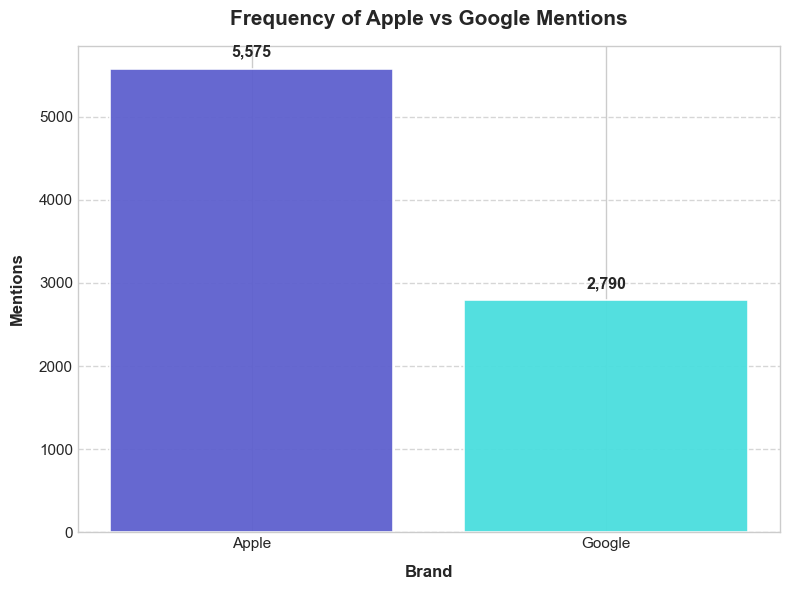

In [582]:
# Data summary
counts = df["product"].value_counts()
print("=== Distribution of Product Mentions ===")
print(counts.to_string())  

# Visualize
fig, ax = plt.subplots(figsize=(8, 6))

brands = counts.index
values = counts.values

# Palette
palette = ["#5E60CE", "#4ADEDE"]

# Bar Plot
bars = ax.bar(
    brands, 
    values, 
    color=palette, 
    edgecolor="white", 
    linewidth=1.2, 
    alpha=0.95
)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + (max(values) * 0.02),
        f"{int(height):,}",
        ha="center",
        va="bottom",
        fontsize=11.5,
        fontweight="semibold",
    )

# Labels
ax.set_title("Frequency of Apple vs Google Mentions", fontsize=15, fontweight="semibold", pad=15)
ax.set_xlabel("Brand", fontsize=12, fontweight="semibold", labelpad=10)
ax.set_ylabel("Mentions", fontsize=12, fontweight="semibold", labelpad=10)

# Grid & Spines
ax.grid(axis='y', linestyle='--', alpha=0.8)
ax.set_axisbelow(True)

# Tighten it all up
plt.tight_layout()
plt.show()

*Observation:* Apple is the most frequently mentioned product in the dataset, indicating a higher level of engagement compared to Google.

### 2. Sentiment Distribution

=== Sentiment Distribution Summary ===
Neutral   : 4,838 (57.8%)
Positive  : 2,959 (35.4%)
Negative  : 568 (6.8%)


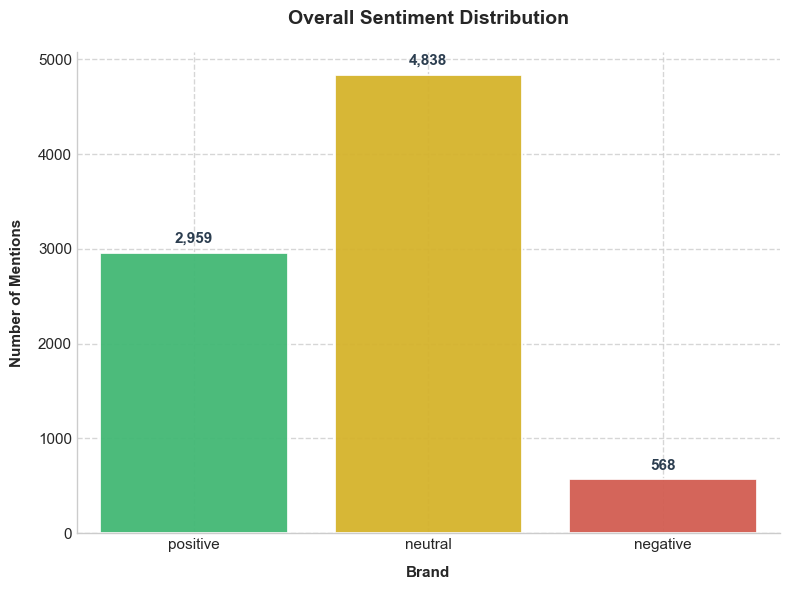

In [603]:
# Simplify Sentiment Labels
df['sentiment'] = df['sentiment'].replace({
    'Positive emotion': 'positive',
    'Negative emotion': 'negative',
    'No emotion toward brand or product': 'neutral',
    "I can't tell": 'neutral'
})

# Count Summary
sentiment_counts = df['sentiment'].value_counts()
total = sentiment_counts.sum()
sentiment_percent = (sentiment_counts / total * 100).round(1)

print("=== Sentiment Distribution Summary ===")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment.capitalize():<10}: {count:,} ({sentiment_percent[sentiment]}%)")

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

# Color Palette
palette = {
    'positive': '#2ECC71',  
    'neutral':  '#F1C40F', 
    'negative': '#E74C3C'   
}

# Plot
bars = sns.countplot(
    data=df,
    x="sentiment",
    order=["positive", "neutral", "negative"],
    palette=palette,
    edgecolor="white",
    linewidth=1.3,
    alpha=0.95,
    ax=ax
)

# Annotate bars
for p in bars.patches:
    height = p.get_height()
    label = f"{int(height):,}"
    ax.text(
        p.get_x() + p.get_width()/2,
        height + (max(sentiment_counts)*0.015),
        label,
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="semibold",
        color="#2C3E50"
    )

# Title and Labels
ax.set_title("Overall Sentiment Distribution", fontsize=14, fontweight="semibold", pad=20)
ax.set_xlabel("Brand", fontsize=11, fontweight="semibold", labelpad=10)
ax.set_ylabel("Number of Mentions", fontsize=11, fontweight="semibold", labelpad=10)

# Grid and spines polish
ax.grid(axis='both', linestyle='--', alpha=0.8)
ax.set_axisbelow(True)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Tighten it all up
plt.tight_layout()
plt.show()

*Observation:* Most people are sitting on the fence with neutral sentiment. Among those who do have an opinion, it's overwhelmingly positive.

### 3. Top mentioned product per brand

=== Apple Product Mentions ===
  Product  Mentions
     ipad      2513
   iphone      1569
    ipad2       464
   itunes        96
     ipod        24
 facetime         7
   safari         5
     imac         2
lightning         2

=== Google Product Mentions ===
Product  Mentions
android       398
 chrome        12
  nexus         6
  pixel         3
  gmail         2
   nest         1


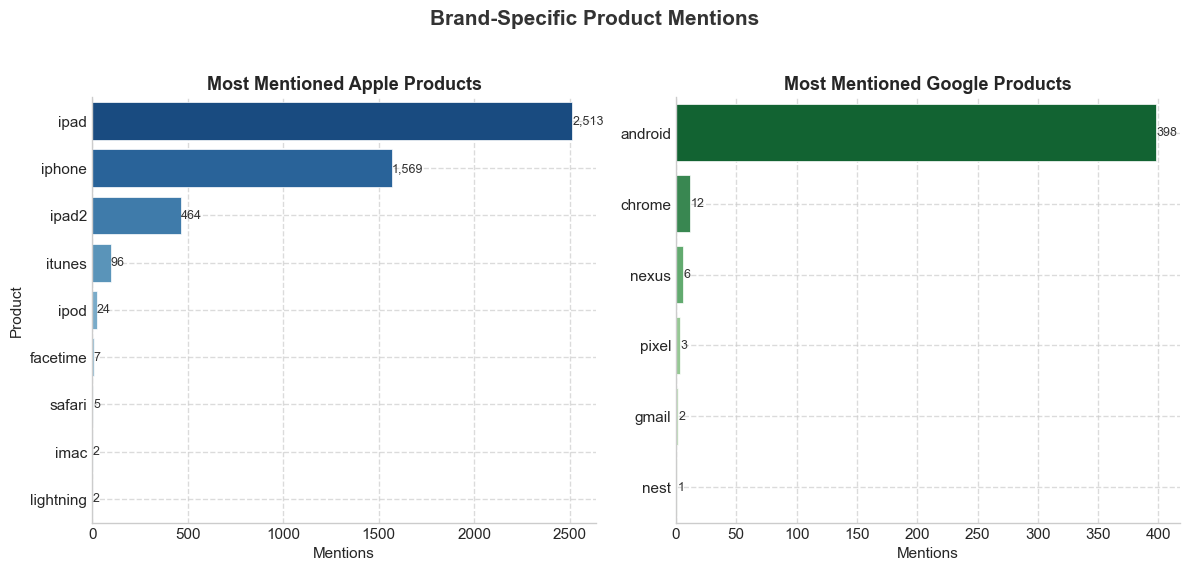

In [ ]:
# Keyword Lists
apple_keywords = [
    'iphone', 'ipad', 'itunes', 'ipad2', 'macbook air', 
    'ipod', 'ios', 'macbook pro', 'imac', 'siri', 'lightning', 
    'facetime', 'safari'
]

google_keywords = [
    'android', 'google maps', 'chrome', 'gmail', 'pixel', 
    'nexus', 'workspace', 'google assistant', 'alexa', 'nest', 
    'google meet', 'duo', 'google ads', 'google pay'
]

# Function to Count Product Mentions from tokens
def count_mentions(tokens_list, keywords):
    return [token for token in tokens_list if token in keywords]

# Filter Mentions per Brand
apple_df = df[df["product"].str.lower() == "apple"]
google_df = df[df["product"].str.lower() == "google"]

# Aggregate Mentions
apple_mentions = Counter(
    word for tokens in apple_df["tokens"] for word in count_mentions(tokens, apple_keywords)
)
google_mentions = Counter(
    word for tokens in google_df["tokens"] for word in count_mentions(tokens, google_keywords)
)

# Convert to DataFrames
apple_mentions_df = (
    pd.DataFrame(apple_mentions.items(), columns=["Product", "Mentions"])
    .sort_values("Mentions", ascending=False)
    .reset_index(drop=True)
)
google_mentions_df = (
    pd.DataFrame(google_mentions.items(), columns=["Product", "Mentions"])
    .sort_values("Mentions", ascending=False)
    .reset_index(drop=True)
)

# Display Summaries
print("=== Apple Product Mentions ===")
print(apple_mentions_df.to_string(index=False))
print("\n=== Google Product Mentions ===")
print(google_mentions_df.to_string(index=False))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5.5))
plt.suptitle(
    "Brand-Specific Product Mentions",
    fontsize=15,
    fontweight="semibold",
    color="#333",
    y=1.03
)

# Helper for Consistent Plot Styling
def plot_mentions(ax, data, title, palette):
    sns.barplot(
        data=data,
        y="Product",
        x="Mentions",
        palette=palette,
        ax=ax
    )
    ax.set_title(title, fontsize=13, fontweight="semibold")
    ax.set_xlabel("Mentions", fontsize=11)
    ax.set_ylabel("Product" if "Apple" in title else "", fontsize=11)
    ax.grid(axis='both', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)
    for bar in ax.patches:
        width = int(bar.get_width())
        ax.text(
            width + 0.3,
            bar.get_y() + bar.get_height()/2,
            f"{width:,}",
            va='center',
            ha='left',
            fontsize=9,
            color="#333"
        )

# Plot Both Brands
plot_mentions(axes[0], apple_mentions_df, "Most Mentioned Apple Products", "Blues_r")
plot_mentions(axes[1], google_mentions_df, "Most Mentioned Google Products", "Greens_r")

# Layout Polishing
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

*Observation:*

- iPad is the star of the show. With 2,513 mentions (plus 464 for ipad2), the iPad accounts for nearly 60% of all Apple product talk. 
- iPhone comes in second but still trails significantly at 1,569 mentions.
- Google means Android. A whopping 94% of Google product mentions are about Android (398 out of 422). 
- Unlike Apple's diverse product portfolio in the conversation, Google is essentially synonymous with their mobile OS here. Chrome, Nexus, and Pixel are afterthoughts.
- The hardware vs software divide. Apple mentions are dominated by hardware (iPad, iPhone, iPod, iMac), while Google's presence is mostly software/OS-based (Android, Chrome).This reflects their brand positioning: Apple as a premium device maker, Google as a platform/software company.
- Newer products barely register. Products like Pixel (3 mentions), Nest (1), and even Apple's FaceTime (7) are virtually invisible. This is because the data is older.
- ipad2 getting 464 separate mentions suggests product-specific conversation happening, not just brand chatter.

### 4. Users sentiments about the tech brands.

=== Emotion Counts per Product ===
sentiment  negative  neutral  positive
product                               
Apple           417     3025      2133
Google          151     1813       826


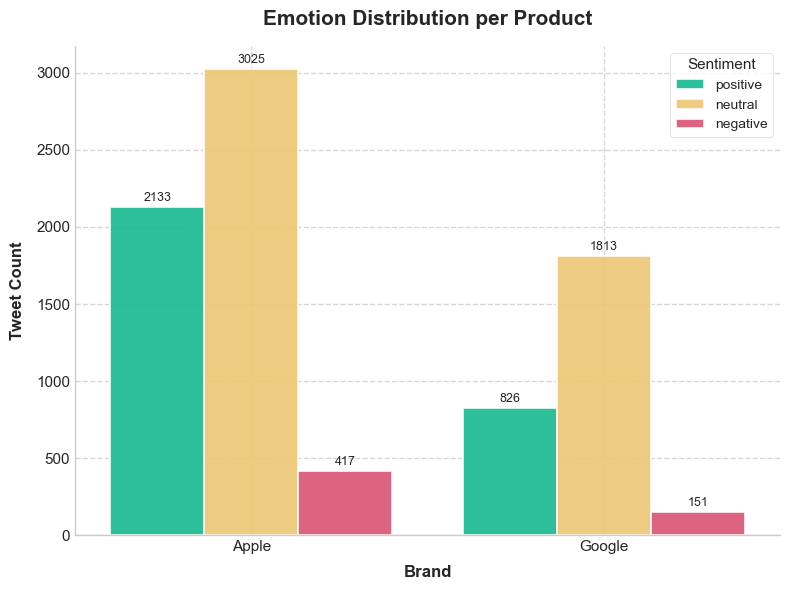

In [610]:
# Emotion Counts per Product
print("=== Emotion Counts per Product ===")
print(df.groupby("product")["sentiment"].value_counts().unstack().fillna(0).astype(int))

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

# Visualise
palette = ["#06D6A0", "#FFD166", "#EF476F"]
sns.countplot(
    data=df,
    x="product",
    hue="sentiment",
    hue_order=["positive", "neutral", "negative"],
    palette=palette,
    edgecolor="white",
    linewidth=1.2,
    alpha=0.95,
    ax=ax
)

# Annotate Bars 
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

# Grid and spines
ax.grid(axis="both", linestyle="--", alpha=0.8)
ax.set_axisbelow(True)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# Titles and labels
ax.set_title("Emotion Distribution per Product", fontsize=15, fontweight="bold", pad=15)
ax.set_xlabel("Brand", fontsize=12, fontweight="semibold", labelpad=8)
ax.set_ylabel("Tweet Count", fontsize=12, fontweight="semibold", labelpad=8)

# Legend
ax.legend(title="Sentiment", title_fontsize=11, fontsize=10, loc="upper right", frameon=True)

# Tighten it all up
plt.tight_layout()
plt.show()

*Observaton:*

- Apple dominates both in volume and emotional pull. Most mentions are neutral but the positive tone still outweighs the negative by a solid margin- pointing to overall satisfaction and strong brand affinity despite occasional criticism.
- Google, meanwhile, sees a smaller and calmer conversation. The majority of mentions are neutral, fewer are positive, and negative sentiment is low. It’s a steadier, less emotional discourse.

### 6. Emotional tagging using wordclouds.

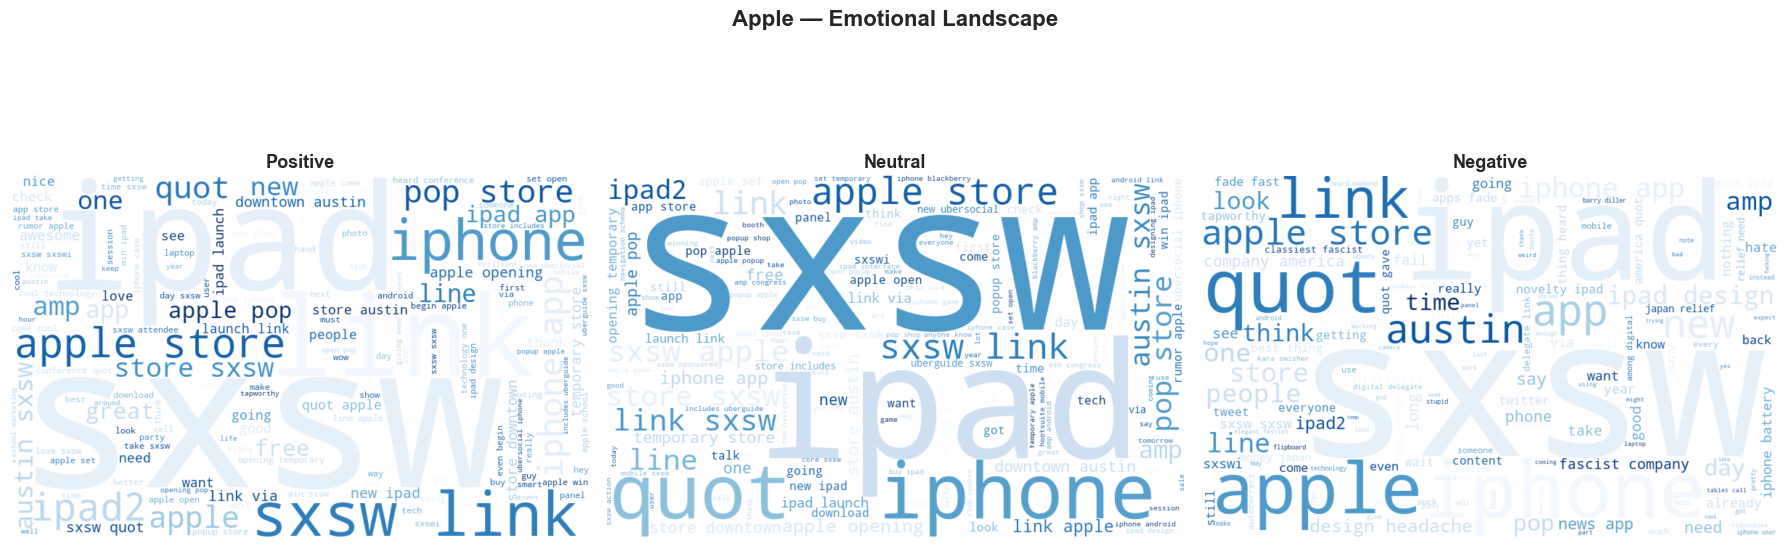

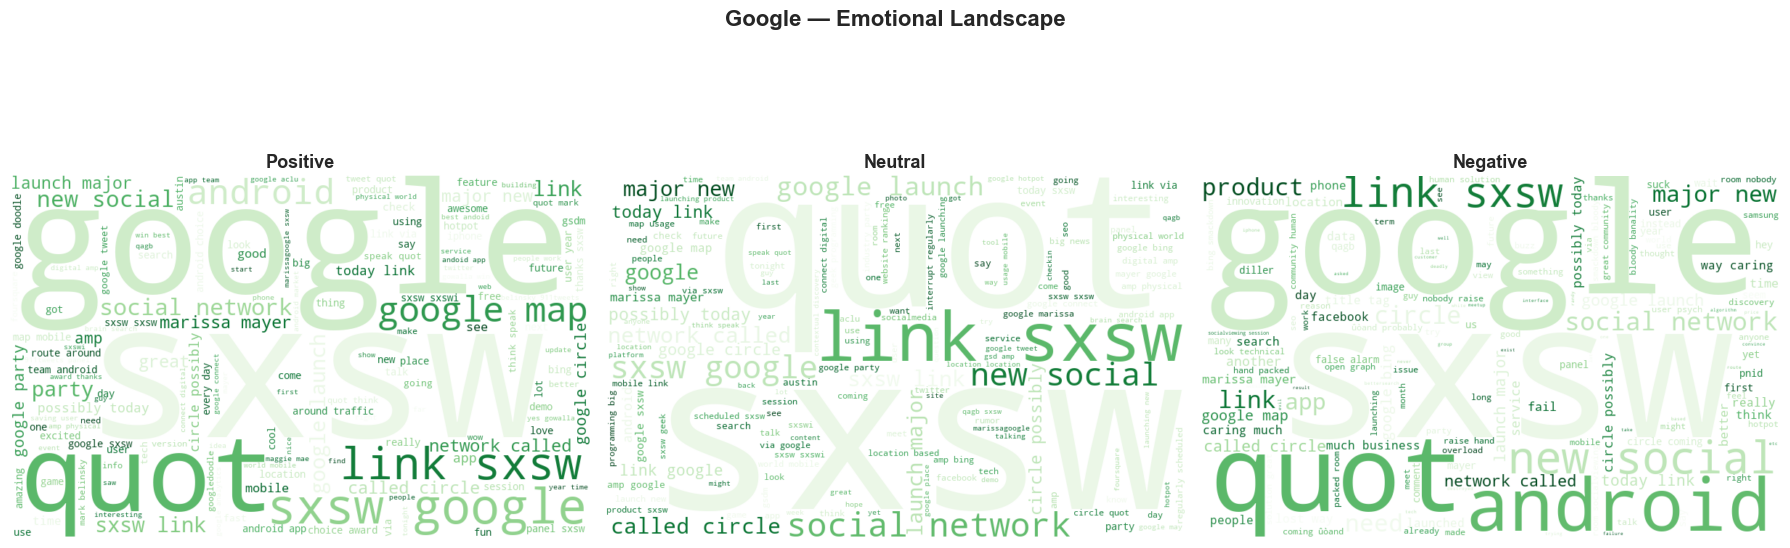

In [586]:
# Function to generate word clouds
def plot_wordclouds(df, brand, sentiments, ncols=3):
    fig, axes = plt.subplots(1, ncols, figsize=(18, 6), facecolor="white")
    fig.suptitle(f"{brand} — Emotional Landscape", fontsize=16, fontweight="semibold", y=1.05)

    for i, sent in enumerate(sentiments):
        subset = df[(df["product"] == brand) & (df["sentiment"] == sent)]
        text = " ".join(subset["clean_tweet"].astype(str).tolist())

        if not text.strip():
            axes[i].text(0.5, 0.5, "No data", ha="center", va="center", fontsize=12)
            axes[i].axis("off")
            continue

        wc = WordCloud(
            width=800,
            height=500,
            background_color="white",
            colormap=("Greens" if brand == "Google" else "Blues"),
            max_words=150,
            contour_color="#1e293b",
            contour_width=1.2,
            random_state=42,
        ).generate(text)

        axes[i].imshow(wc, interpolation="bilinear")
        axes[i].set_title(sent.capitalize(), fontsize=13, fontweight="semibold")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

# Sentiments
sentiments = ["positive", "neutral", "negative"]

# Generate word clouds for both brands
plot_wordclouds(df, "Apple", sentiments)
plot_wordclouds(df, "Google", sentiments)

### 5. Average tweet length across sentiment classes.

=== Average Tweet Length per Brand ===
product  tweet_length
 Google     11.248746
  Apple     10.745112

=== Average Tweet Length per Sentiment Class ===
product sentiment  tweet_length
  Apple  negative     11.014388
  Apple  positive     10.733708
  Apple   neutral     10.716033
 Google  negative     11.622517
 Google  positive     11.485472
 Google   neutral     11.109763


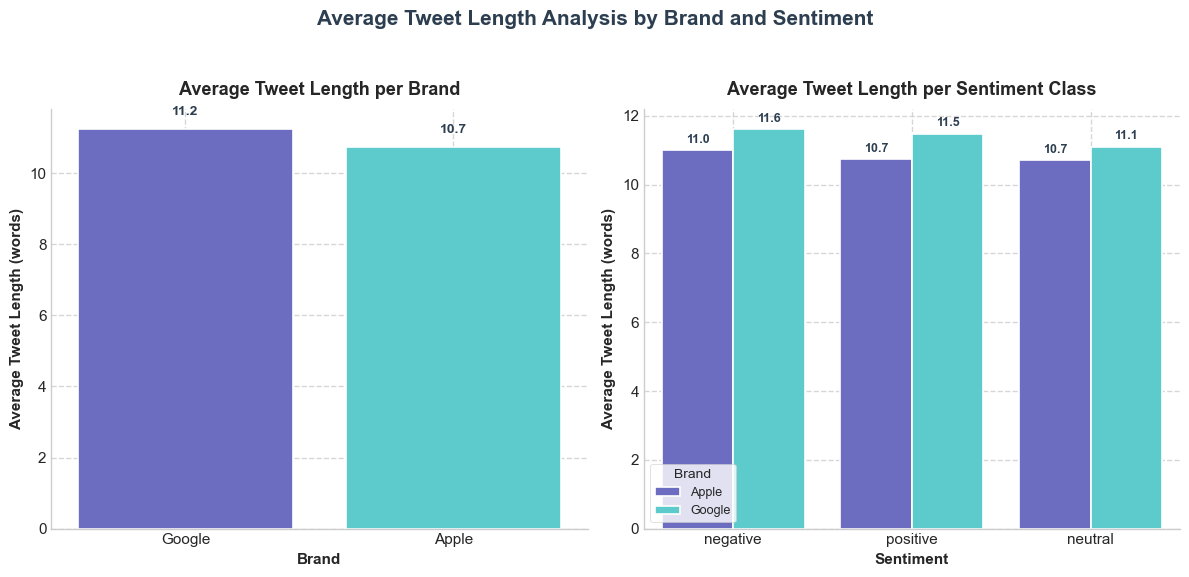

In [ ]:
# Create a Safe Copy 
tweet_df = df.copy(deep=True)

# Compute Tweet Length
tweet_df["tweet_length"] = tweet_df["clean_tweet"].astype(str).apply(lambda x: len(x.split()))

# Average Tweet Length per Brand
brand_length = (
    tweet_df.groupby("product", as_index=False)["tweet_length"]
    .mean()
    .sort_values(by="tweet_length", ascending=False)
)

print("=== Average Tweet Length per Brand ===")
print(brand_length.to_string(index=False))

# Average Tweet Length per Brand & Sentiment
sentiment_length = (
    tweet_df.groupby(["product", "sentiment"], as_index=False)["tweet_length"]
    .mean()
    .sort_values(by=["product", "tweet_length"], ascending=[True, False])
)

print("\n=== Average Tweet Length per Sentiment Class ===")
print(sentiment_length.to_string(index=False))

# Plot setup
fig, axes = plt.subplots(1, 2, figsize=(12, 5.5))
plt.suptitle(
    "Average Tweet Length Analysis by Brand and Sentiment",
    fontsize=15,
    fontweight="bold",
    color="#2C3E50",
    y=1.04
)

# Palettes
brand_palette = ["#5E60CE", "#4ADEDE"] 
sentiment_palette = {"positive": "#2ECC71", "neutral": "#F1C40F", "negative": "#E74C3C"}

# Average Tweet Length per Brand
sns.barplot(
    data=brand_length,
    x="product",
    y="tweet_length",
    palette=brand_palette,
    edgecolor="white",
    linewidth=1.2,
    ax=axes[0]
)

axes[0].set_title("Average Tweet Length per Brand", fontsize=13, fontweight="semibold", pad=10)
axes[0].set_xlabel("Brand", fontsize=11, fontweight="semibold")
axes[0].set_ylabel("Average Tweet Length (words)", fontsize=11, fontweight="semibold")
axes[0].grid(axis="both", linestyle="--", alpha=0.7)
axes[0].set_axisbelow(True)

# Annotate Bars
for bar in axes[0].patches:
    value = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        value + 0.3,
        f"{value:.1f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="semibold",
        color="#2C3E50"
    )

# Average Tweet Length per Sentiment Class 
sns.barplot(
    data=sentiment_length,
    x="sentiment",
    y="tweet_length",
    hue="product",
    palette=brand_palette,
    edgecolor="white",
    linewidth=1.2,
    ax=axes[1]
)

axes[1].set_title("Average Tweet Length per Sentiment Class", fontsize=13, fontweight="semibold", pad=10)
axes[1].set_xlabel("Sentiment", fontsize=11, fontweight="semibold")
axes[1].set_ylabel("Average Tweet Length (words)", fontsize=11, fontweight="semibold")
axes[1].legend(title="Brand", title_fontsize=10, fontsize=9, frameon=True, loc="lower left")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
axes[1].set_axisbelow(True)

# Annotate Bars
for container in axes[1].containers:
    axes[1].bar_label(
        container,
        fmt="%.1f",
        fontsize=9,
        padding=3,
        fontweight="semibold",
        color="#2C3E50"
    )

# Grid styling
for ax in axes:
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.grid(axis="both", linestyle="--", alpha=0.8)
    ax.set_axisbelow(True)

# Tighten it all up
plt.tight_layout()
plt.show()

*Observation:*

- Tweets about Google tend to be slightly longer on average than those about Apple, hinting that people use more words when talking about Google- maybe to explain features, share experiences, or express opinions that need context.
- Within each brand:
    - For Apple, tweet length barely changes across sentiments; whether positive or negative, people keep it short and punchy.
    - For Google, negative tweets are the longest, followed by positive ones, suggesting that when users complain or praise, they go into more detail.
- Apple talk is concise and reactive; Google talk is wordier and more explanatory. People say more when they’ve got something to critique or appreciate.

### 6. What were the top words for each brand and sentiment.


=== Top Words for Apple positive ===
  Word  Count
  sxsw   2272
  ipad   1021
 apple    923
  link    916
 store    555
iphone    535
   app    321
  quot    272
austin    265
   new    221

=== Top Words for Apple negative ===
  Word  Count
  sxsw    431
  ipad    194
iphone    160
  quot    127
 apple    123
  link     63
   app     52
 store     47
design     29
  apps     25

=== Top Words for Apple neutral ===
  Word  Count
  sxsw   3274
  link   1402
  ipad   1298
 apple   1278
 store    895
iphone    874
austin    518
  quot    450
   pop    364
   amp    299

=== Top Words for Google positive ===
   Word  Count
   sxsw    844
 google    727
   link    291
   quot    192
android    163
    new    138
 circle    124
  party    112
    map    112
 social    102

=== Top Words for Google negative ===
   Word  Count
   sxsw    153
 google    149
   quot     48
   link     39
 circle     36
 social     29
    new     21
 launch     19
android     18
network     17

=== Top Words fo

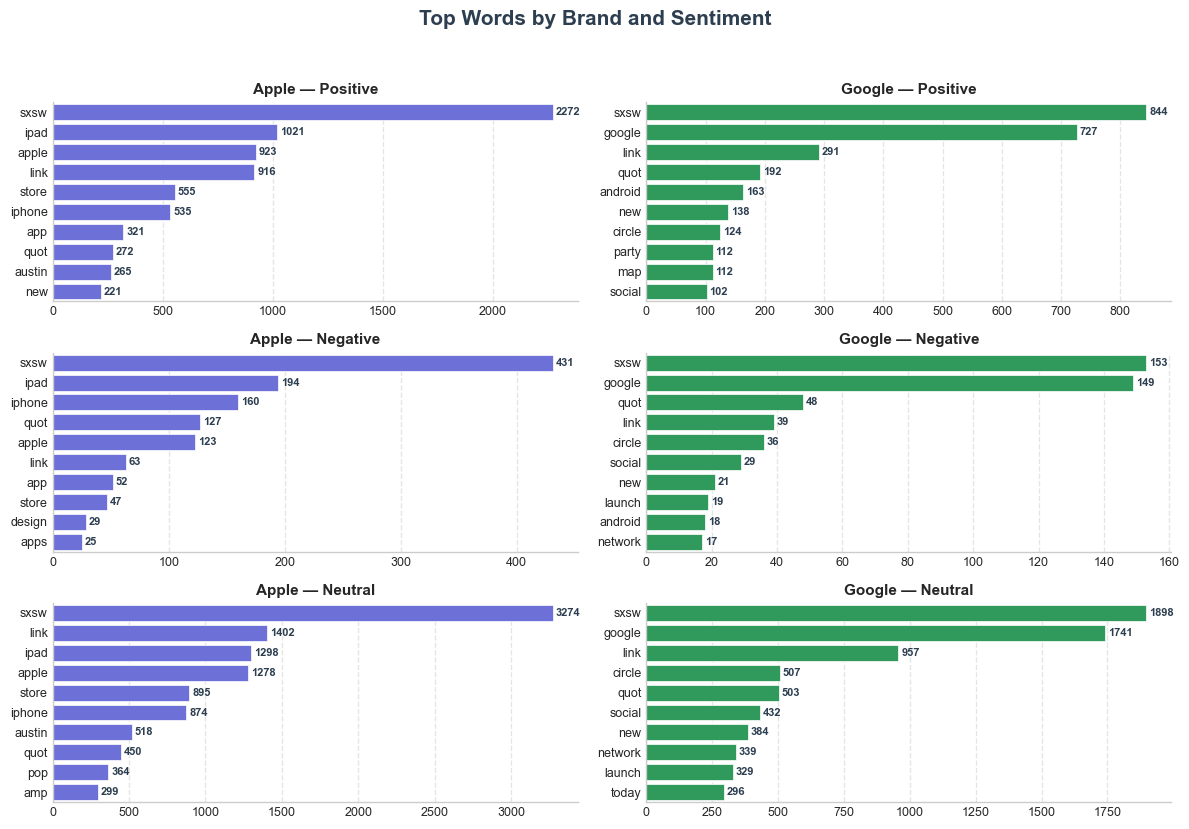

In [ ]:
# Extract Top Words per Brand–Sentiment
def get_top_words(df, brand, sentiment, n=10):
    subset = df[(df["product"] == brand) & (df["sentiment"] == sentiment)]
    if subset.empty:
        return pd.DataFrame(columns=["Word", "Count"])
    
    words = " ".join(subset["clean_tweet"]).split()
    filtered = [w for w in words if len(w) > 2 and w.lower() not in STOPWORDS]
    counts = Counter(filtered)

    return pd.DataFrame(counts.most_common(n), columns=["Word", "Count"])

# Collect Data
sentiments = ["positive", "negative", "neutral"]
brands = ["Apple", "Google"]
top_words = {
    f"{b}_{s}": get_top_words(df, b, s)
    for b in brands for s in sentiments
}

# Console Output
for key, tbl in top_words.items():
    print(f"\n=== Top Words for {key.replace('_', ' ')} ===")
    print(tbl.to_string(index=False))

# Visualize
fig, axes = plt.subplots(len(sentiments), len(brands), figsize=(12, 8), sharex=False)
plt.suptitle(
    "Top Words by Brand and Sentiment",
    fontsize=15, fontweight="bold", color="#2C3E50", y=1.03
)

# Palette
palette_map = {"Apple": "#5B5FE8", "Google": "#1FAA59"}

for col, brand in enumerate(brands):
    for row, sent in enumerate(sentiments):
        ax = axes[row, col]
        data = top_words[f"{brand}_{sent}"]

        sns.barplot(
            data=data,
            y="Word", x="Count",
            color=palette_map[brand],
            ax=ax
        )

        ax.set_title(f"{brand} — {sent.capitalize()}", fontsize=11, fontweight="semibold", pad=6)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.tick_params(axis='both', labelsize=9)
        ax.grid(axis="x", linestyle="--", alpha=0.5)
        ax.set_axisbelow(True)

        for spine in ["top", "right"]:
            ax.spines[spine].set_visible(False)

        # Bar labels
        for container in ax.containers:
            ax.bar_label(
                container, fmt="%d",
                fontsize=8, padding=2, color="#2C3E50", fontweight="semibold"
            )

# Tighten it all up
plt.tight_layout()
plt.show()

*Observation:*

- Both brands are heavily tied to SXSW, showing that much of the buzz came from event-driven chatter rather than everyday brand talk.
- For Apple, iPad, iPhone and store dominate across sentiments, signs that discussions centered on products and launches. Even in negative tweets, the same words appear, just in smaller volume, meaning criticism likely revolved around the same topics people praised (e.g product quality, design, or pricing).
- For Google, circle, social, and launch pop up alongside android and google maps, revealing attention around Google+ and related features. Negatives reuse these words too, implying mixed reactions; users talked about the same things whether they liked them or not.

### 7. N-Grams Analysis


=== ALL TWEETS ===

Top Unigrams:
 ngram  count
  sxsw   8872
  link   3668
google   2651
  ipad   2516
 apple   2331
  quot   1592
iphone   1584
 store   1507
   new   1046
austin    902

Top Bigrams:
         ngram  count
     sxsw link    884
     link sxsw    750
   apple store    603
social network    439
    new social    403
     pop store    347
    store sxsw    344
 google launch    334
   austin sxsw    321
network called    311

Top Trigrams:
                 ngram  count
    new social network    377
 social network called    311
 network called circle    298
      major new social    279
      launch major new    271
   google launch major    263
 circle possibly today    220
called circle possibly    219
       today link sxsw    195
   possibly today link    191


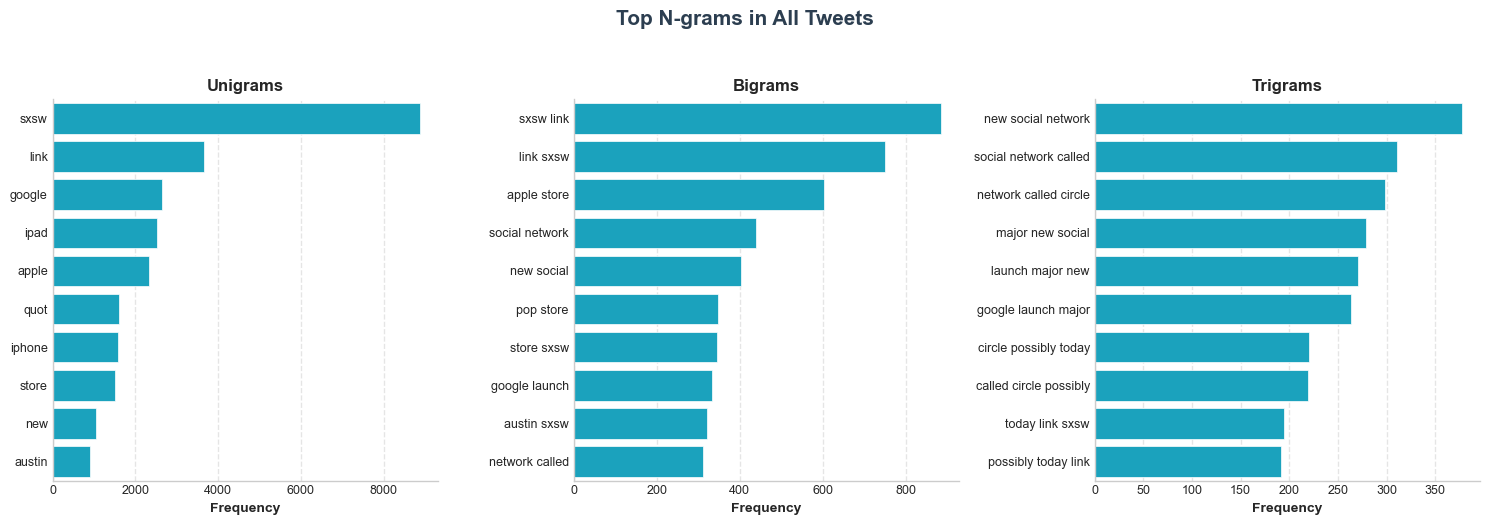


=== APPLE TWEETS ===

Top Unigrams:
 ngram  count
  sxsw   5977
  ipad   2513
  link   2381
 apple   2324
iphone   1569
 store   1497
  quot    849
austin    808
   app    649
   pop    594

Top Bigrams:
        ngram  count
  apple store    603
    sxsw link    588
    pop store    347
   store sxsw    343
  austin sxsw    305
    link sxsw    299
    ipad sxsw    296
   iphone app    288
   sxsw apple    285
apple opening    226

Top Trigrams:
                   ngram  count
         apple pop store    166
   store downtown austin    162
        apple store sxsw    144
        sxsw apple store    123
    downtown austin sxsw    120
 apple opening temporary    115
 opening temporary store    113
         store sxsw link    111
temporary store downtown     98
        pop store austin     95


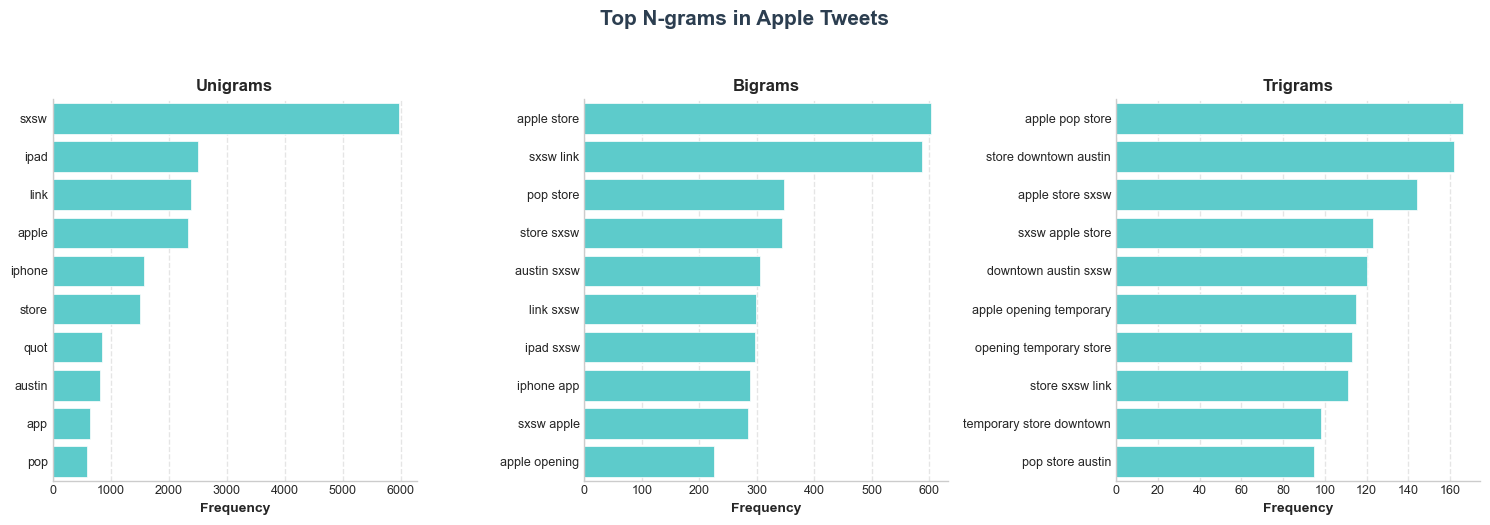


=== GOOGLE TWEETS ===

Top Unigrams:
  ngram  count
   sxsw   2895
 google   2617
   link   1287
   quot    743
 circle    667
 social    563
    new    543
network    440
 launch    435
android    398

Top Bigrams:
         ngram  count
     link sxsw    451
social network    432
    new social    402
 google launch    334
network called    311
 called circle    303
     sxsw link    296
     major new    279
  launch major    271
    today link    230

Top Trigrams:
                 ngram  count
    new social network    377
 social network called    311
 network called circle    298
      major new social    279
      launch major new    271
   google launch major    263
 circle possibly today    220
called circle possibly    219
       today link sxsw    194
   possibly today link    191


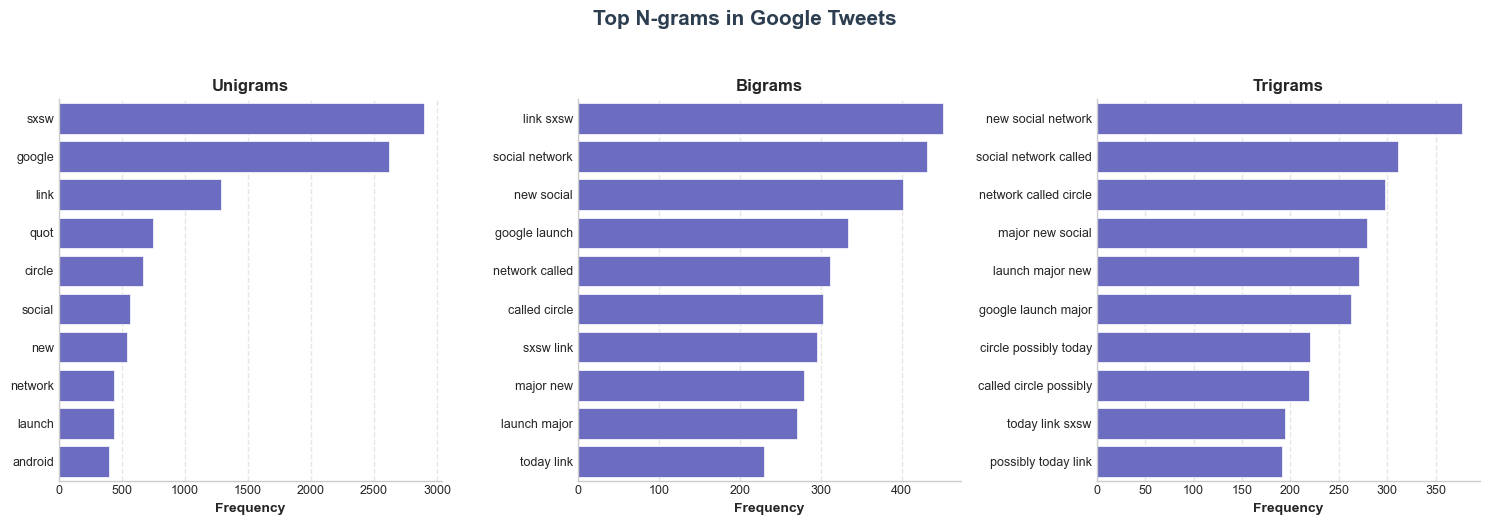


=== NEGATIVE SENTIMENT ===

Top Unigrams:
 ngram  count
  sxsw    584
  ipad    195
  quot    175
iphone    162
google    151
 apple    123
  link    102
   app     60
 store     47
   new     43

Top Bigrams:
          ngram  count
      link sxsw     26
    apple store     25
     iphone app     24
      sxsw link     24
    ipad design     20
design headache     17
  google circle     16
     new social     16
      quot sxsw     16
    iphone sxsw     16

Top Trigrams:
                  ngram  count
   ipad design headache     16
     new social network     13
         ipad news apps     12
       major new social     12
  social network called     11
  network called circle     11
fascist company america     11
       launch major new     10
    google launch major      9
      novelty ipad news      9


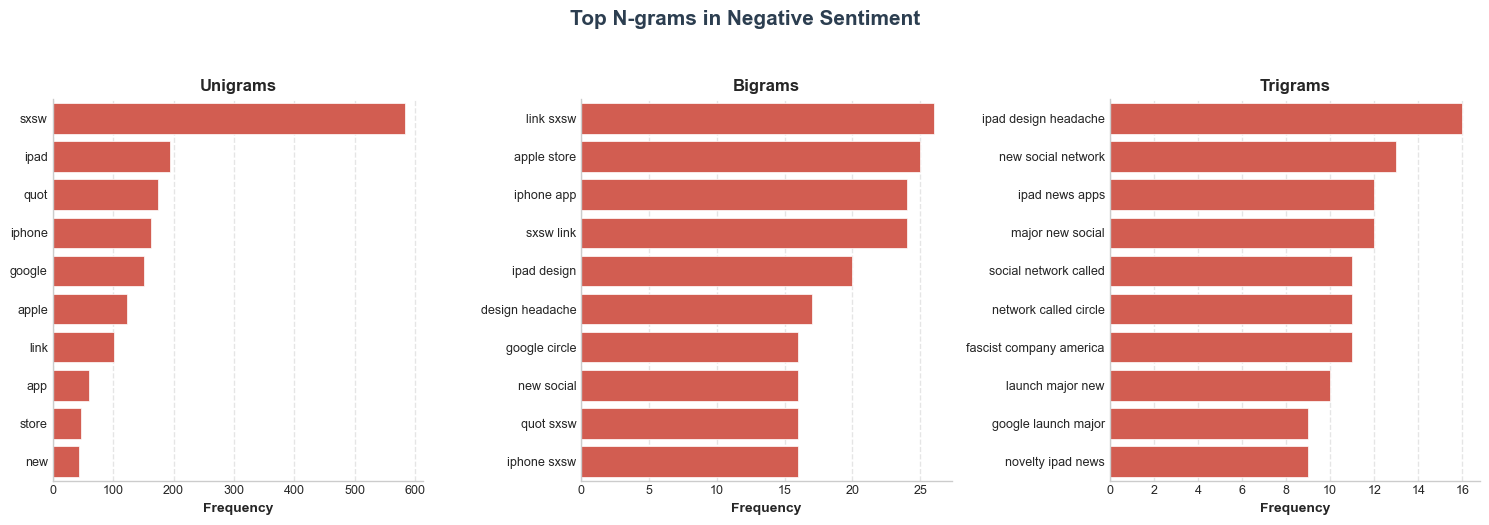


=== POSITIVE SENTIMENT ===

Top Unigrams:
 ngram  count
  sxsw   3116
  link   1207
  ipad   1023
 apple    930
google    734
 store    558
iphone    548
  quot    464
   app    393
   new    359

Top Bigrams:
      ngram  count
  sxsw link    318
apple store    223
  link sxsw    198
 iphone app    136
  pop store    133
  ipad sxsw    124
 store sxsw    123
 sxsw apple    118
austin sxsw    103
 google map     87

Top Trigrams:
                ngram  count
   new social network     74
store downtown austin     65
      apple pop store     63
social network called     57
network called circle     57
     sxsw apple store     54
     launch major new     54
     major new social     54
  google launch major     50
     apple store sxsw     46


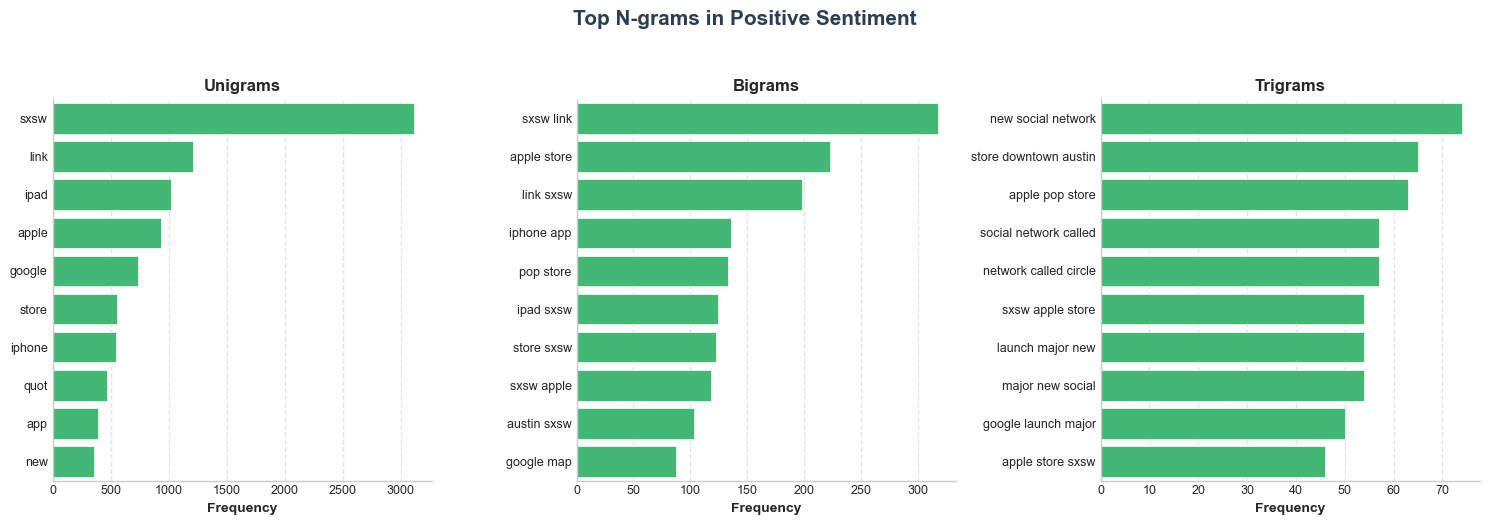


=== NEUTRAL SENTIMENT ===

Top Unigrams:
 ngram  count
  sxsw   5172
  link   2359
google   1766
  ipad   1298
 apple   1278
  quot    953
 store    902
iphone    874
   new    644
austin    582

Top Bigrams:
         ngram  count
     sxsw link    542
     link sxsw    526
   apple store    355
social network    338
    new social    310
 google launch    257
network called    243
 called circle    234
    store sxsw    214
     major new    213

Top Trigrams:
                 ngram  count
    new social network    290
 social network called    243
 network called circle    230
      major new social    213
      launch major new    207
   google launch major    204
called circle possibly    174
 circle possibly today    174
       today link sxsw    151
   possibly today link    150


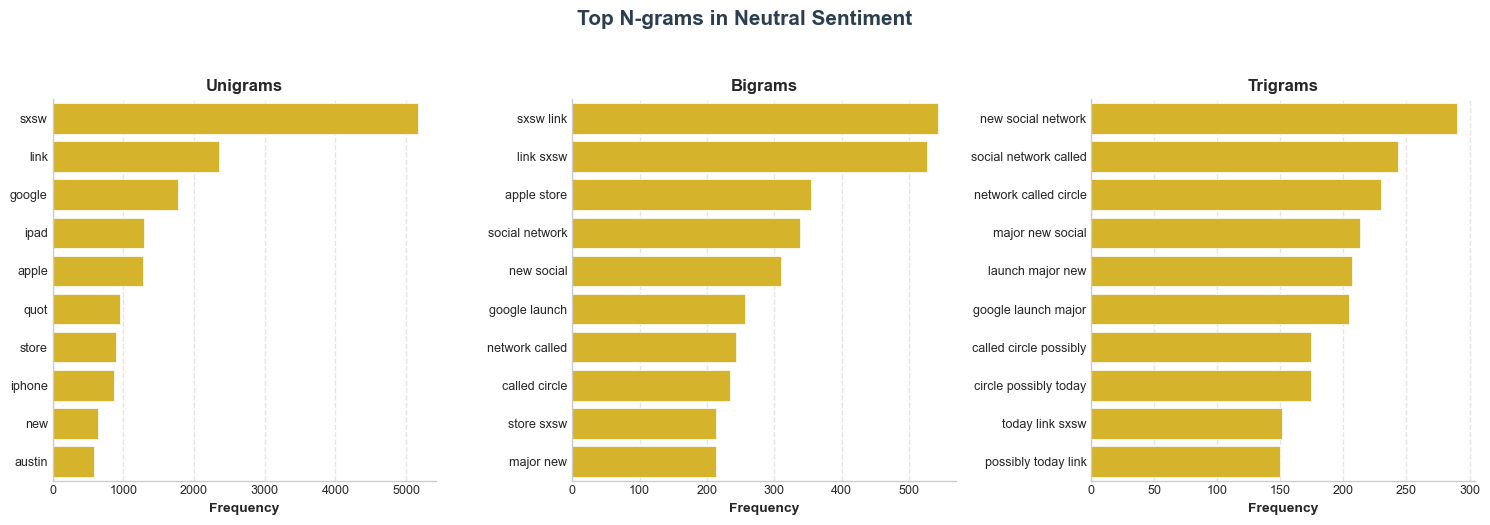

In [620]:
# Function to extract top n-grams
def get_top_ngrams(corpus, n=1, top_k=15):
    '''
        Return a DataFrame of the top n-grams and their frequencies.
    '''
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag = vec.transform(corpus)
    sum_words = bag.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return pd.DataFrame(words_freq[:top_k], columns=['ngram', 'count'])


# Function to create subplot grids with printed distributions
def plot_ngram_grid(df, title_prefix, n_list=[1, 2, 3], top_k=10, color="#4ADEDE"):
    '''
        Print the n-gram distributions and plot top unigrams, bigrams, and trigrams in one figure.
    '''
    print(f"\n=== {title_prefix.upper()} ===")
    fig, axes = plt.subplots(1, len(n_list), figsize=(15, 5))
    fig.suptitle(
        f"Top N-grams in {title_prefix}",
        fontsize=15, fontweight="bold", color="#2C3E50", y=1.04
    )

    for i, n in enumerate(n_list):
        df_ng = get_top_ngrams(df, n=n, top_k=top_k)
        
        # Print out the top n-grams before plotting
        print(f"\nTop {['Unigrams', 'Bigrams', 'Trigrams'][i]}:")
        print(df_ng.to_string(index=False))

        sns.barplot(
            data=df_ng, y="ngram", x="count",
            color=color, ax=axes[i]
        )
        axes[i].set_title(
            f"{['Unigrams','Bigrams','Trigrams'][i]}",
            fontsize=12, fontweight="semibold", pad=6
        )
        axes[i].set_xlabel("Frequency", fontsize=10, fontweight="semibold")
        axes[i].set_ylabel("")
        axes[i].tick_params(axis='both', labelsize=9)
        axes[i].grid(axis="x", linestyle="--", alpha=0.5)
        axes[i].set_axisbelow(True)
        for spine in ["top", "right"]:
            axes[i].spines[spine].set_visible(False)

    plt.tight_layout()
    plt.show()


# === OVERALL ===
plot_ngram_grid(df["clean_tweet"], "All Tweets", color="#00B4D8")

# === PER BRAND ===
brand_colors = {"Apple": "#4ADEDE", "Google": "#5E60CE"}

for brand in df["product"].unique():
    brand_df = df[df["product"] == brand]["clean_tweet"]
    plot_ngram_grid(
        brand_df,
        f"{brand.title()} Tweets",
        color=brand_colors.get(brand, "#4ADEDE")
    )

# === PER SENTIMENT ===
sentiment_colors = {"positive": "#2ECC71", "neutral": "#F1C40F", "negative": "#E74C3C"}

for sentiment in df["sentiment"].unique():
    sent_df = df[df["sentiment"] == sentiment]["clean_tweet"]
    plot_ngram_grid(
        sent_df,
        f"{sentiment.title()} Sentiment",
        color=sentiment_colors.get(sentiment, "#FF9F1C")
    )


*Observation:*

